In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [71]:
'''A bit of constants.'''

cmtoev = 1.98e-5

gtoev = 5.62e32

stoev = 1/(6.58e-16)

In [72]:
df = pd.read_csv('datafromabsorption.csv',sep=';',header=None)

dataset_menos = pd.read_csv("Default Dataset (3).csv", sep=';',header=None)

transmitance = pd.read_csv('transmittancedata.csv', sep=";", header=None)

novo = pd.read_csv('dataset4.csv', sep=';', header=None)

data1 = pd.read_csv('data1.csv', sep=';', header=None)

data2 = pd.read_csv('data2.csv', sep=';', header=None)

data1_new, data2_new = data1*cmtoev, data2*cmtoev

df_new = df*cmtoev

dataset_new = dataset_menos*cmtoev

novo_modificado = novo*cmtoev

data1_new

data1

,0,1
0,661.430074,2909.695332
1,664.199719,2714.522643
2,665.187273,3489.518773
3,664.199719,3180.391076
4,666.423782,4040.706060
...,...,...
100,1589.345789,1236.364768
101,1594.667691,1157.404980
102,1592.004516,1079.028071
103,1605.365015,975.986302


In [73]:
l = 0.0203544

absoportion_1 = [-np.log(transmitance.iloc[x,1])/(l*0.035) for x in range(len(transmitance))]

transmitance.iloc[:,1] = absoportion_1

transmitance_new = transmitance*cmtoev

juntando = pd.concat([transmitance_new.iloc[:258,:258],novo_modificado])

juntando.to_csv('dados_juntos.csv', sep=';', index=False, header=False)




In [74]:
dados = pd.read_csv('dados_juntos.csv', sep=';', header=None)
dados


lista1 = [dados.iloc[x,0] for x in range(len(dados))]
sorting = sorted(lista1)

for i in range(len(sorting)):
    dados.iloc[i,0] = sorting[i]

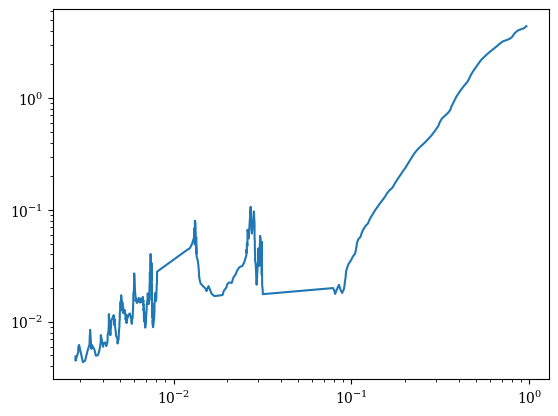

In [75]:
plt.plot(dados[0],dados[1])
plt.xscale('log')
plt.yscale('log')
#plt.xlim(600,5e4)


In [76]:
#Vou colocar alguns dados numéricos aqui:
n = 1*(cmtoev*1e7)**3#atomos/cm3
rho = 3* gtoev * (cmtoev)**3#g/cm3
rho_dm = 0.3e9 *(cmtoev)**3 #ev/cm3
year = 3.156e7*stoev
v = 1e-3
c = 3e8
kg = gtoev*1e3
day = 86400*stoev
concentration = 1e-5 #mol/L

In [77]:
def kappa(m, alpha):
    sensitivity = 1/(kg*year)
    ratio = (rho*m)/(rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))

def kappa2(m, alpha):
    sensitivity = 1/(kg*day)
    ratio = (rho*m)/(rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))

In [78]:
kappa(data1_new.iloc[27,0],data1_new.iloc[27,1])

1.452340095503696e-17

In [79]:
interpolation = interp1d(dados.iloc[:,0],dados.iloc[:,1], kind='linear', fill_value="extrapolate")

graphkgyear = [kappa(dados.iloc[x,0],dados.iloc[x,1]) for x in range(len(dados))]
graphkgday = [kappa2(dados.iloc[x,0],dados.iloc[x,1]) for x in range(len(dados))]

len(graphkgday)

457

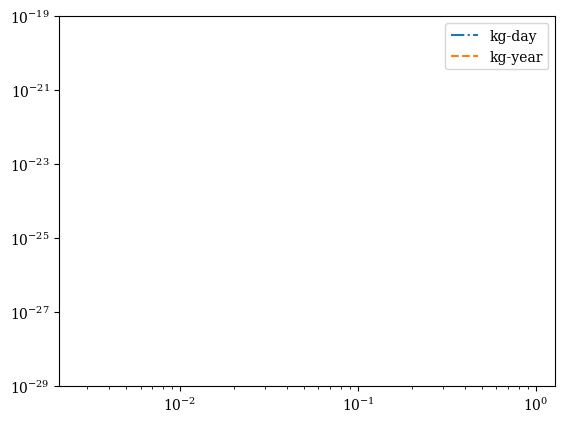

In [80]:
plt.plot(dados[0],graphkgday, linestyle='dashdot', label='kg-day')
plt.plot(dados[0],graphkgyear, linestyle='--', label='kg-year')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-29,1e-19)
#plt.xlim(1e-3,10)
plt.legend()
#plt.savefig('plottt.pdf', format='pdf')

In [81]:
#I want to try and interpolate separetly.

fit1 = np.polyfit(data1_new.iloc[:,0], data1_new.iloc[:,1], 1)

fit2 = np.polyfit(data2_new.iloc[:,0], data2_new.iloc[:,1], 3)

fit3 = np.polyfit(transmitance_new.iloc[:,0], transmitance_new.iloc[:,1],2)

funcao1 = np.poly1d(fit1)

funcao2 = np.poly1d(fit2)

funcao3 = np.poly1d(fit3)

lista_plot1 = [funcao1(data1_new.iloc[x,0]) for x in range(len(data1_new))]

lista_plot2 = [funcao2(data2_new.iloc[x,0]) for x in range(len(data2_new))]

lista_plot3 = [funcao2(transmitance_new.iloc[x,0]) for x in range(len(transmitance_new))]

lista_plot4 = lista_plot3 + lista_plot1 + lista_plot2 

xaxis = [transmitance_new.iloc[x,0] for x in range(len(transmitance_new))] + [data1_new.iloc[x,0] for x in range(len(data1_new))] + [data2_new.iloc[x,0] for x in range(len(data2_new))]

#plt.plot(data1_new.iloc[:,0], lista_plot1)
#plt.plot(data2_new.iloc[:,0], lista_plot2)
#plt.plot(transmitance_new.iloc[:,0], lista_plot3)
#plt.plot(xaxis, lista_plot4)

#plt.xscale('log')
#plt.yscale('log')



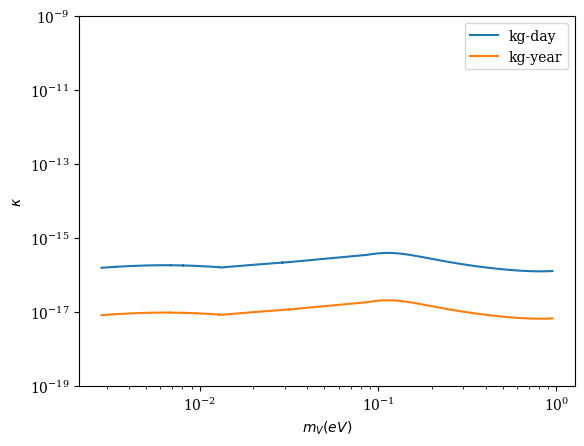

In [107]:
graphkgyear1 = [kappa(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgyear2 = [kappa(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgyear3 = [kappa(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
#graph = [kappa(xaxis[x], lista_plot4[x]) for x in range(len(xaxis))]
graph2 = graphkgyear3 + graphkgyear1 + graphkgyear2

graphkgday1 = [kappa2(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgday2 = [kappa2(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgday3 = [kappa2(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
graph3 = graphkgday3 + graphkgday1 + graphkgday2

#plt.plot(data1_new.iloc[:,0], graphkgyear1)
#plt.plot(data2_new.iloc[:,0], graphkgyear2)
#plt.plot(transmitance_new.iloc[:,0], graphkgyear3)
plt.plot(xaxis, graph3, label='kg-day')
plt.plot(xaxis, graph2, label = 'kg-year')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\kappa$')
plt.xlabel('$m_V(eV)$')
plt.ylim(1e-19, 1e-9)
plt.legend()

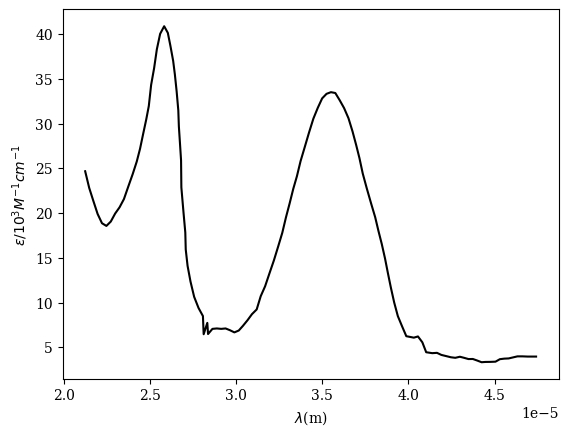

In [83]:
dataDY = pd.read_csv('dataDY.csv', sep =';', header=None)
plt.plot(dataDY.iloc[:,0], dataDY.iloc[:,1], color = 'black')
plt.ylabel('$\epsilon/10^3 M^{-1} cm^{-1} $')
plt.xlabel('$\lambda$(m)')
plt.savefig('dataDY2absorption.pdf', format='pdf')

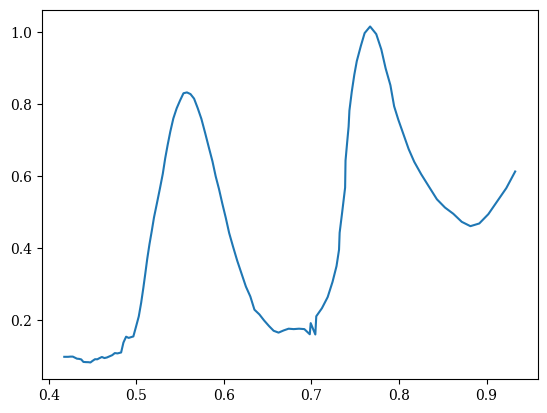

In [84]:
dataDY.iloc[:,0] = 1/(dataDY.iloc[:,0])
conversion = 789/629.016
dataDY.iloc[:,1] = dataDY.iloc[:,1]*1e3*conversion
dataDY = dataDY*cmtoev
'''I have to look for the actual meaning of M^-1. If I do multiply by the concentration, the order of magnitude in cm^-1 of 
the absorption is very different than the one in the other papers. This difference in order of magnitude is important, because
it causes a shift of 3 orders in the mixing angle.'''

dataDY
plt.plot(dataDY.iloc[:,0], dataDY.iloc[:,1])

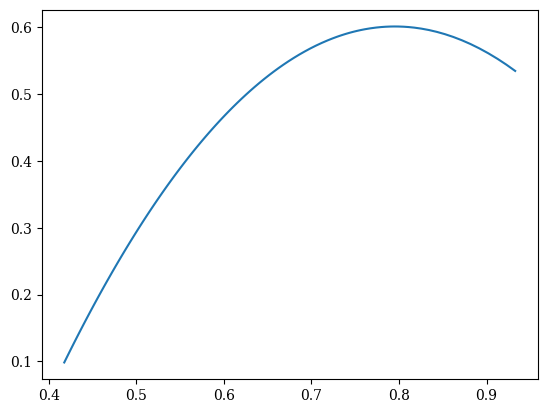

In [85]:
fit4 = np.polyfit(dataDY.iloc[:,0], dataDY.iloc[:,1],2)

func4 = np.poly1d(fit4)
lista_plot5 = [func4(dataDY.iloc[x,0]) for x in range(len(dataDY))]

plt.plot(dataDY.iloc[:,0], lista_plot5)

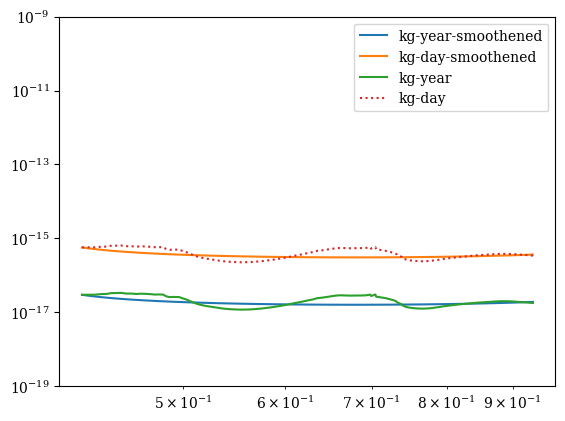

In [86]:
#Curva para Dy2(dbm)4(OQ)2(CH3OH)2

graphkgyear4_smooth = [kappa(dataDY.iloc[x,0], func4(dataDY.iloc[x,0])) for x in range(len(dataDY))]

graphkgday4_smooth = [kappa2(dataDY.iloc[x,0], func4(dataDY.iloc[x,0])) for x in range(len(dataDY))]

graphkgyear4 = [kappa(dataDY.iloc[x,0], dataDY.iloc[x,1]) for x in range(len(dataDY))]
graphkgday4 = [kappa2(dataDY.iloc[x,0], dataDY.iloc[x,1]) for x in range(len(dataDY))]
plt.plot(dataDY.iloc[:,0], graphkgyear4_smooth, label='kg-year-smoothened')
plt.plot(dataDY.iloc[:,0], graphkgday4_smooth, label='kg-day-smoothened')
plt.plot(dataDY.iloc[:,0], graphkgyear4, label='kg-year', linestyle='-')
plt.plot(dataDY.iloc[:,0], graphkgday4, label='kg-day', linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19, 1e-9)
#plt.xlim(1e-1,10e-1)
plt.legend()

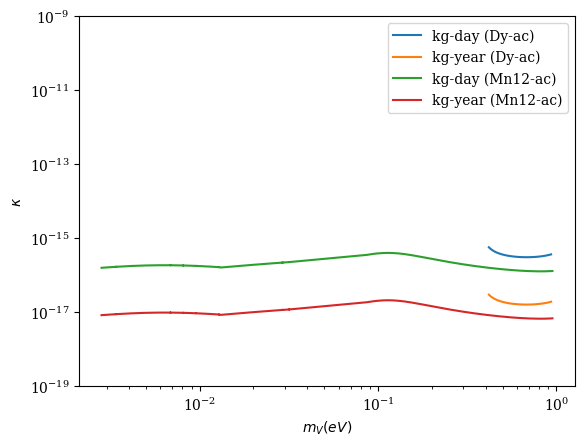

In [87]:
plt.plot(dataDY.iloc[:,0], graphkgday4_smooth, label='kg-day (Dy-ac)')
plt.plot(dataDY.iloc[:,0], graphkgyear4_smooth, label='kg-year (Dy-ac)')
#plt.plot(dataDY.iloc[:,0], graphkgyear4, label='kg-year', linestyle='-')
#plt.plot(dataDY.iloc[:,0], graphkgday4, label='kg-day', linestyle=':')
plt.plot(xaxis, graph3, label='kg-day (Mn12-ac)')
plt.plot(xaxis, graph2, label = 'kg-year (Mn12-ac)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\kappa$')
plt.xlabel('$m_V(eV)$')
plt.ylim(1e-19, 1e-9)
plt.legend()
#plt.savefig('plot.pdf', format='pdf')

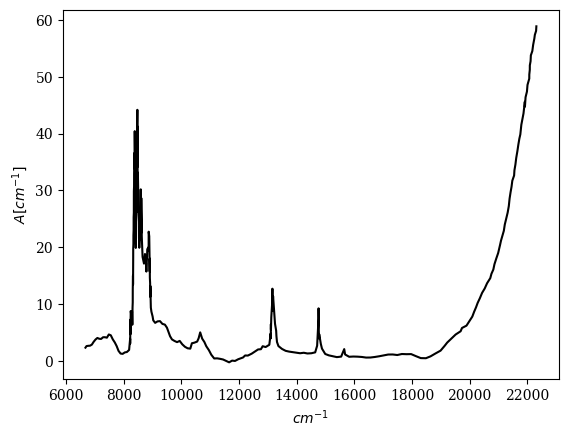

In [88]:
dataDY3 = pd.read_csv('dyIII-data.csv', sep=';', header=None)

plt.plot(dataDY3.iloc[:,0], dataDY3.iloc[:,1], color='black')
plt.xlabel('$cm^{-1}$')
plt.ylabel('$A[cm^{-1}]$')

plt.savefig('dyIIIabsorption.pdf', format='pdf')


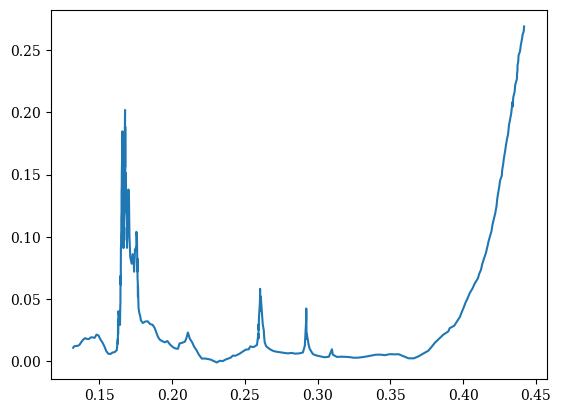

In [89]:
dataDY3 = dataDY3*cmtoev

conversion_2 = 870/(1405.39*2.68e-3)

dataDY3.iloc[:,1] = dataDY3.iloc[:,1]*conversion_2

fit5 = np.polyfit(dataDY3.iloc[:,0], dataDY3.iloc[:,1],2)

func5 = np.poly1d(fit5)

plt.plot(dataDY3.iloc[:,0], dataDY3.iloc[:,1])

/tmp/ipykernel_10574/2808742504.py:4: RuntimeWarning: invalid value encountered in sqrt
  return (np.sqrt((sensitivity*ratio)))


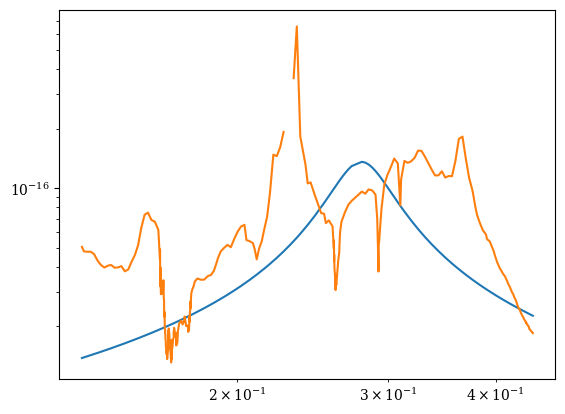

In [90]:
graphkgyearDY3 = [kappa(dataDY3.iloc[x,0], func5(dataDY3.iloc[x,0])) for x in range(len(dataDY3))]
graphkgyearDY3_raw = [kappa(dataDY3.iloc[x,0], dataDY3.iloc[x,1]) for x in range(len(dataDY3))]

graphkgdayDY3 = [kappa2(dataDY3.iloc[x,0], func5(dataDY3.iloc[x,0])) for x in range(len(dataDY3))]


plt.plot(dataDY3.iloc[:,0], graphkgyearDY3)
plt.plot(dataDY3.iloc[:,0], graphkgyearDY3_raw)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-17,1e-7)

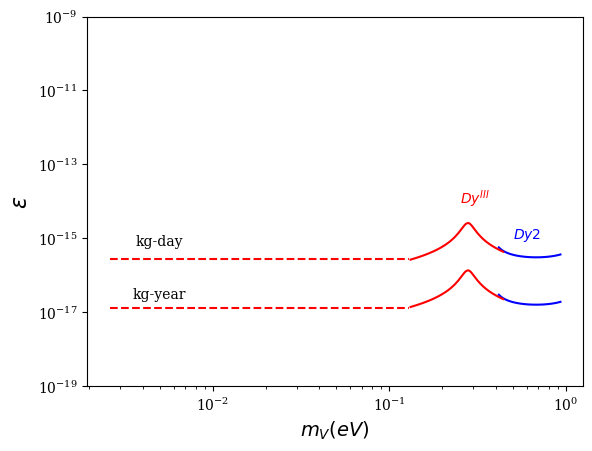

In [91]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'


plt.plot(dataDY.iloc[:,0], graphkgday4_smooth, label='kg-day ($Dy2$)', color = 'blue')
plt.plot(dataDY.iloc[:,0], graphkgyear4_smooth, label='kg-year ($Dy2$)', color='blue')

#These two graphs are from one data set.

#plt.plot(dataDY.iloc[:,0], graphkgyear4, label='kg-year', linestyle='-')
#plt.plot(dataDY.iloc[:,0], graphkgday4, label='kg-day', linestyle=':')
graphkgyearDY3 = [kappa(dataDY3.iloc[x,0], func5(dataDY3.iloc[x,0])) for x in range(len(dataDY3))]


#plt.plot(xaxis, graph3, label='kg-day (Mn12-ac)')
#plt.plot(xaxis, graph2, label = 'kg-year (Mn12-ac)')
plt.plot(dataDY3.iloc[:,0], graphkgdayDY3, label='kg-day($Dy^{III}$)', color = 'red')
plt.plot(dataDY3.iloc[:,0], graphkgyearDY3, label='kg-year ($Dy^{III}$)', color = 'red')

#These two are from other data set.

x1, x2 = 2.6e-3, 0.13
y1, y2 = 1.298e-17, 1.298e-17
y3, y4 = 2.7e-16, 2.7e-16

x = np.logspace(np.log10(x1), np.log10(x2), 100)
y = np.logspace(np.log10(y1), np.log10(y2), 100)
y_day = np.logspace(np.log10(y3), np.log10(y4), 100)


#In here I am plotting the expected sensitivity that we whish the experiment will have if we infer data in this region.

plt.plot(x,y, linestyle = '--', color ='red')
plt.plot(x, y_day, linestyle = '--', color = 'red')


plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\epsilon$', fontsize=16)
plt.xlabel('$m_V(eV)$', fontsize = 14)
plt.ylim(1e-19, 1e-9)
plt.text(0.5e-2,0.8e-15, "kg-day", ha='center', va='center')
plt.text(0.5e-2,0.3e-16, "kg-year", ha='center', va='center')
plt.text(2.5e-1, 9e-15, "$Dy^{III}$", color='red')
plt.text(5e-1, 1e-15, "$Dy2$", color='blue')
#plt.legend()
plt.savefig('plot_novo.pdf', format='pdf')

In [92]:
#Here, I will define new functions for the kinetic mixing.

#f = 1e-9

def new_kappa(m, alpha, f):
    sensitivity = 1/(kg*year)
    ratio = (rho*m)/(f*rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))

def new_kappa2(m, alpha, f):
    sensitivity = 1/(kg*day)
    ratio = (rho*m)/(f*rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))

In [93]:
'''
graphkgyear1_new = [new_kappa(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgyear2_new = [new_kappa(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgyear3_new = [new_kappa(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
graph_new = [new_kappa(xaxis[x], lista_plot4[x]) for x in range(len(xaxis))]
graph2_new = graphkgyear3_new + graphkgyear1_new + graphkgyear2_new

graphkgday1_new = [new_kappa2(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgday2_new = [new_kappa2(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgday3_new = [new_kappa2(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
graph3_new = graphkgday3_new + graphkgday1_new + graphkgday2_new

#plt.plot(data1_new.iloc[:,0], graphkgyear1)
#plt.plot(data2_new.iloc[:,0], graphkgyear2)
#plt.plot(transmitance_new.iloc[:,0], graphkgyear3)
plt.plot(xaxis, graph3_new, label='kg-day')
plt.plot(xaxis, graph2_new, label = 'kg-year')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\kappa$')
plt.xlabel('$m_V(eV)$')
plt.ylim(1e-19, 1e-9)
plt.legend()
'''

"\ngraphkgyear1_new = [new_kappa(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] \ngraphkgyear2_new = [new_kappa(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]\ngraphkgyear3_new = [new_kappa(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]\ngraph_new = [new_kappa(xaxis[x], lista_plot4[x]) for x in range(len(xaxis))]\ngraph2_new = graphkgyear3_new + graphkgyear1_new + graphkgyear2_new\n\ngraphkgday1_new = [new_kappa2(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] \ngraphkgday2_new = [new_kappa2(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]\ngraphkgday3_new = [new_kappa2(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]\ngraph3_new = graphkgday3_new + graphkgday1_new + graphkgday2_new\n\n#plt.plot(data1_new.iloc[:,0], graphkgyear1)\n#plt.plot(da

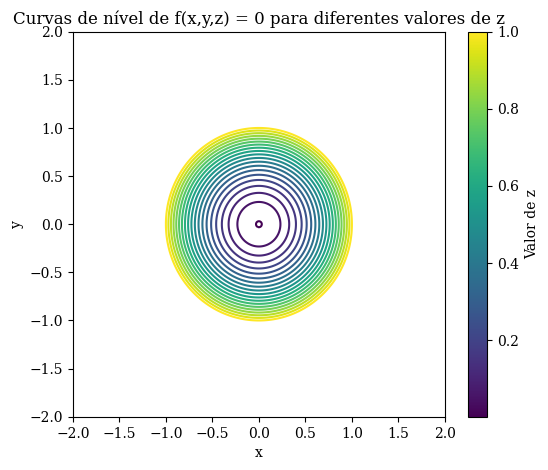

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Definindo a função f(x, y, z)
def f(x, y, z):
    return x**2 + y**2 - z  # Exemplo: circunferências com raio sqrt(z)

# Criando uma grade de valores de x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Valores de z no intervalo desejado
z_values = np.linspace(0.001, 1, 20)  # 20 valores de z

# Criando o gráfico
fig, ax = plt.subplots(figsize=(6, 5))

# Criando um mapa de cores para associar os valores de z às cores
cmap = cm.viridis
norm = colors.Normalize(vmin=0.001, vmax=1)

# Loop para desenhar cada curva de nível com uma cor correspondente a z
for z in z_values:
    ax.contour(X, Y, f(X, Y, z), levels=[0], colors=[cmap(norm(z))])

# Criando a barra de cores corretamente e associando ao eixo correto
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label="Valor de z")  # Agora o colorbar sabe de onde roubar espaço!

# Rótulos e título
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Curvas de nível de f(x,y,z) = 0 para diferentes valores de z")

plt.show()


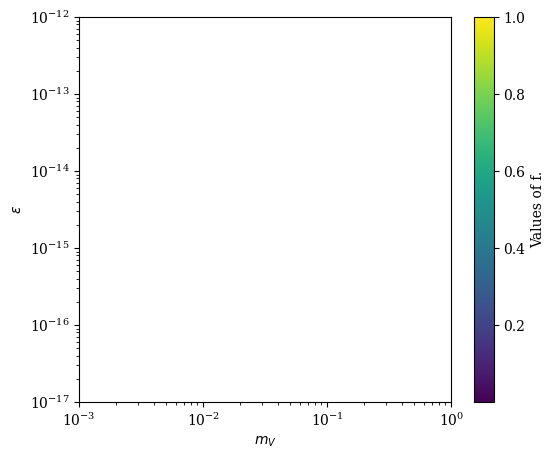

In [95]:
'''Quero criar o colormap aqui.'''

import matplotlib.cm as cm
import matplotlib.colors as colors

X, Y = np.meshgrid(data1_new.iloc[:,0], data1_new.iloc[:,1])

f_values = np.linspace(1e-5,1, 10)

fig, ax = plt.subplots(figsize=(6,5))

cmap = cm.viridis
norm = colors.Normalize(vmin=1e-5, vmax=1)

for f in f_values:
    ax.contour(X, new_kappa(X,Y,f), levels=[0], colors = [cmap(norm(z))])

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Values of f.')

plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('$m_V$')
ax.set_ylabel('$\epsilon$')
plt.ylim(1e-17, 1e-12)
plt.xlim(1e-3, 1)
plt.show()


Exemplo de saída de new_kappa(X, Y, f):
[[9.73593482e-18 9.75629744e-18 9.76354775e-18 ... 1.51045516e-17
  1.51677997e-17 1.51340345e-17]
 [1.00798642e-17 1.01009462e-17 1.01084526e-17 ... 1.56381315e-17
  1.57036139e-17 1.56686559e-17]
 [8.89034566e-18 8.90893974e-18 8.91556034e-18 ... 1.37926852e-17
  1.38504402e-17 1.38196075e-17]
 ...
 [1.59876652e-17 1.60211033e-17 1.60330092e-17 ... 2.48036288e-17
  2.49074905e-17 2.48520436e-17]
 [1.68104584e-17 1.68456173e-17 1.68581360e-17 ... 2.60801289e-17
  2.61893358e-17 2.61310353e-17]
 [1.74542245e-17 1.74907299e-17 1.75037280e-17 ... 2.70788825e-17
  2.71922714e-17 2.71317384e-17]]


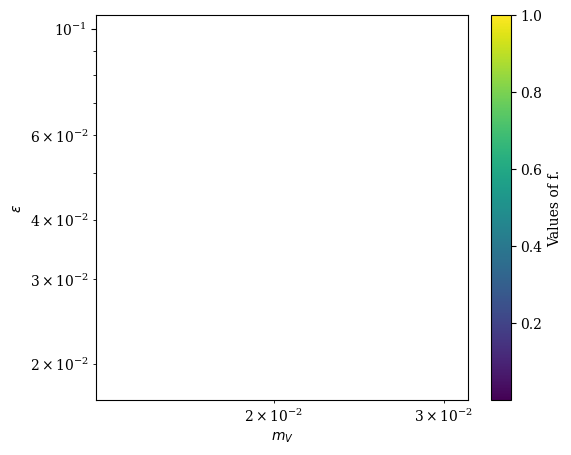

In [96]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

# Supondo que data1_new e new_kappa já estão definidos corretamente
X, Y = np.meshgrid(data1_new.iloc[:, 0], data1_new.iloc[:, 1])

f_values = np.linspace(1e-5, 1, 100)

fig, ax = plt.subplots(figsize=(6, 5))

cmap = cm.viridis
norm = colors.Normalize(vmin=1e-5, vmax=1)

# Mapeamento de cores com base em 'f'
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessário para evitar erro de falta de dados de mapeamento

# Verificando um valor da função new_kappa para depuração
print("Exemplo de saída de new_kappa(X, Y, f):")
print(new_kappa(X, Y, 0.5))  # Teste com um valor de f fixo, ajuste conforme necessário

# Gerando as curvas de nível
for f in f_values:
    Z = new_kappa(X, Y, f)
    if np.any(Z != 0):  # Verifica se há valores diferentes de zero para plotar
        ax.contour(X, Y, Z, levels=[0], colors=[cmap(norm(f))])

# Adicionando a barra de cores
fig.colorbar(sm, ax=ax, label='Values of f.')

# Ajustando escalas e rótulos
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('$m_V$')
ax.set_ylabel('$\epsilon$')

# Exibindo o gráfico
plt.show()


ValueError: operands could not be broadcast together with shapes (564,) (105,) 

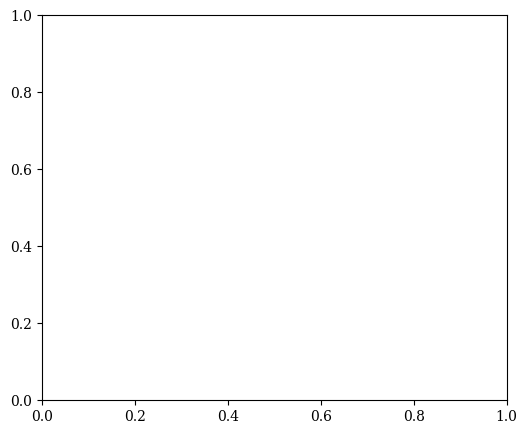

In [105]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

# Supondo que data1_new e new_kappa já estão definidos corretamente
X = np.array(data1_new.iloc[:, 0])  # Converter para numpy array (valores de x)
f_values = np.linspace(0.001, 1, 100)  # Variando o parâmetro z de 0.001 a 1

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(6, 5))

# Colormap e normalização
cmap = cm.viridis
norm = colors.Normalize(vmin=0.001, vmax=1)

# Gerando as curvas de nível para cada valor de f
for f in f_values:
    # Gerar uma matriz 2D para kappa usando meshgrid
    X_grid = np.array(data1_new.iloc[:, 0])  # Eixo X com valores de x
    graph1 = new_kappa(data1_new.iloc[:,0], funcao1(data1_new.iloc[:,1]), f)  # Calculando kappa para cada valor de f
    graph2 = [new_kappa(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0]),f) for x in range(len(data2_new))]
    graph3 = [new_kappa(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0]),f) for x in range(len(transmitance_new))]
    Y_values = graph3 + graph1 + graph1

    # Gerando as curvas de nível com as cores baseadas no valor de f (z)
    ax.plot(xaxis, Y_values, color=cmap(norm(f)))

# Adicionando a barra de cores
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Values of $z$')

plt.plot(data1_new.iloc[:,0], new_kappa(data1_new.iloc[:,0], data1_new.iloc[:,1], 1), color='black')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19, 1e-9)
# Ajustando escalas e rótulos
ax.set_xlabel('$x$')  # Eixo X: valores de x
ax.set_ylabel('$\kappa(x, y, z)$')  # Eixo Y: valores de kappa

# Exibindo o gráfico
plt.show()


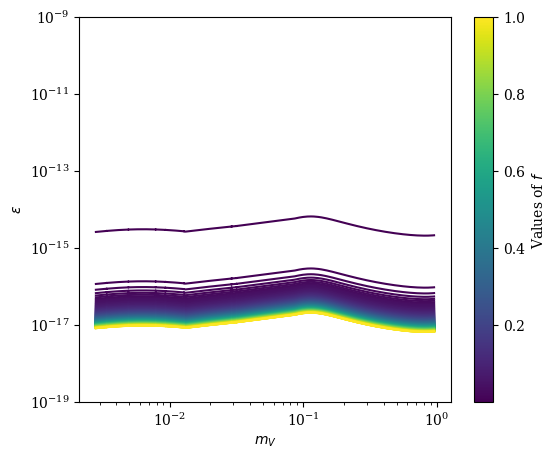

In [117]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

# Supondo que data1_new, data2_new, transmitance_new e as funções estejam definidas corretamente
X = np.array(data1_new.iloc[:, 0])  # Converter para numpy array (valores de x)
f_values = np.linspace(1e-5, 1, 200)  # Variando o parâmetro z de 0.001 a 1

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(6, 5))

# Colormap e normalização
cmap = cm.viridis
norm = colors.Normalize(vmin=0.001, vmax=1)

# Gerando as curvas de nível para cada valor de f
for f in f_values:
    # Gerar as listas de valores para Y para cada gráfico
    graph1 = [new_kappa(data1_new.iloc[x, 0], funcao1(data1_new.iloc[x, 0]), f) for x in range(len(data1_new))]
    graph2 = [new_kappa(data2_new.iloc[x, 0], funcao2(data2_new.iloc[x, 0]), f) for x in range(len(data2_new))]
    graph3 = [new_kappa(transmitance_new.iloc[x, 0], funcao3(transmitance_new.iloc[x, 0]), f) for x in range(len(transmitance_new))]
    
    # Concatenando as listas de Y para gerar a curva completa
    Y_values = np.concatenate([graph3, graph1, graph2])

    # Gerando as curvas de nível com as cores baseadas no valor de f (z)
    ax.plot(xaxis, Y_values, color=cmap(norm(f)))

# Adicionando a barra de cores
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Values of $f$')

# Exibindo uma curva preta para o valor específico de f = 1
#ax.plot(data1_new.iloc[:, 0], kappa(data1_new.iloc[:, 0], funcao1(data1_new.iloc[:, 0])), color='black')

# Ajustando a escala logarítmica para ambos os eixos
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19, 1e-9)

# Ajustando escalas e rótulos
ax.set_xlabel('$m_V$')  # Eixo X: valores de x
ax.set_ylabel('$\epsilon$')  # Eixo Y: valores de kappa

# Exibindo o gráfico
plt.show()


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

# Supondo que data1_new, data2_new, transmitance_new e as funções estejam definidas corretamente
X = np.array(data1_new.iloc[:, 0])  # Converter para numpy array (valores de x)
f_values = np.linspace(1e-5, 1, 200)  # Variando o parâmetro z de 0.001 a 1

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(6, 5))

# Colormap e normalização
cmap = cm.viridis
norm = colors.Normalize(vmin=0.001, vmax=1)

# Gerando as curvas de nível para cada valor de f
for f in f_values:
    # Gerar as listas de valores para Y para cada gráfico
    graph1 = [new_kappa(data1_new.iloc[x, 0], funcao1(data1_new.iloc[x, 0]), f) for x in range(len(data1_new))]
    graph2 = [new_kappa(data2_new.iloc[x, 0], funcao2(data2_new.iloc[x, 0]), f) for x in range(len(data2_new))]
    graph3 = [new_kappa(transmitance_new.iloc[x, 0], funcao3(transmitance_new.iloc[x, 0]), f) for x in range(len(transmitance_new))]
    
    # Concatenando as listas de Y para gerar a curva completa
    Y_values = np.concatenate([graph3, graph1, graph2])

    # Gerando as curvas de nível com as cores baseadas no valor de f (z)
    ax.plot(xaxis, Y_values, color=cmap(norm(f)))

# Adicionando a barra de cores
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Values of $f$')

# Exibindo uma curva preta para o valor específico de f = 1
#ax.plot(data1_new.iloc[:, 0], kappa(data1_new.iloc[:, 0], funcao1(data1_new.iloc[:, 0])), color='black')

# Ajustando a escala logarítmica para ambos os eixos
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19, 1e-9)

# Ajustando escalas e rótulos
ax.set_xlabel('$m_V$')  # Eixo X: valores de x
ax.set_ylabel('$\epsilon$')  # Eixo Y: valores de kappa

# Exibindo o gráfico
plt.show()
